## Gradient Descent Analysis on Termite Dataset

This notebook applies the Gradient Descent algorithm to predict termite discovery using the initial and final weights of wood blocks. Our aim is to demonstrate how Gradient Descent, as an optimization technique, can be effectively utilized in a real-world ecological dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../../global_termite_microbe_wd.csv')  # Adjust the path as needed

## Data Exploration

Let's start by exploring our dataset. We'll check the structure of the data and any missing values. The dataset includes measurements such as the initial and final weights of wood blocks and whether termites were discovered. This analysis focuses on predicting termite discovery using logistic regression modeled via gradient descent.



In [2]:
# Selecting relevant features and handling missing values
selected_columns = ['initial_wt', 'final_wt', 'termite_discovery']
selected_data = df[selected_columns].dropna()

# Normalize the features to have mean 0 and standard deviation 1
selected_data[['initial_wt', 'final_wt']] = (selected_data[['initial_wt', 'final_wt']] - selected_data[['initial_wt', 'final_wt']].mean()) / selected_data[['initial_wt', 'final_wt']].std()

## Implementing Gradient Descent

We will implement the Gradient Descent algorithm to minimize the cost function of our model. Note that this implementation uses the sigmoid activation function. The algorithm will iteratively adjust the weights to reduce the prediction error. 


In [3]:
# Sigmoid function to map predictions to probabilities
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the cost for logistic regression
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X.dot(weights))
    epsilon = 1e-5  # to prevent log(0)
    cost = (1/m) * ((-y.T).dot(np.log(h + epsilon)) - (1 - y).T.dot(np.log(1 - h + epsilon)))
    return cost

# Gradient descent algorithm to minimize the logistic regression cost function
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Update weights
        weights = weights - (learning_rate/m) * X.T.dot(sigmoid(X.dot(weights)) - y)
        # Record the cost
        cost_history[i] = compute_cost(X, y, weights)

    return weights, cost_history

## Model Training with Gradient Descent

Next, we'll train our model using the Gradient Descent algorithm. We will track the cost function to ensure it's decreasing, indicating that our model is learning.


C:\Users\isabe\AppData\Local\Temp\ipykernel_31244\2223366148.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = compute_cost(X, y, weights)


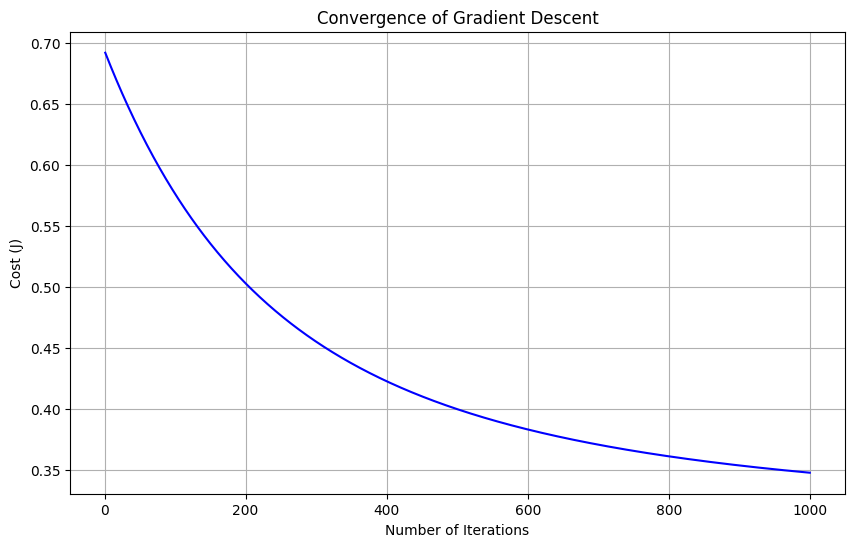

In [4]:
# Adding a column of ones to the feature matrix to account for the intercept
X = np.hstack((np.ones((selected_data.shape[0], 1)), selected_data[['initial_wt', 'final_wt']].values))
y = selected_data['termite_discovery'].values.reshape(-1,1)

# Initialize weights to zeros
weights = np.zeros((X.shape[1], 1))
learning_rate = 0.01
iterations = 1000

# Train the model using gradient descent
weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

# Plot the cost history to show convergence of the algorithm
plt.figure(figsize=(10,6))
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')
plt.show()


The graph visualizes the decrease in the cost function over iterations, illustrating the effectiveness of gradient descent in optimizing the logistic regression model.

## Conclusion

The Gradient Descent algorithm successfully optimized the model's weights. The cost function's convergence indicates that the model's predictions became more accurate over iterations. This approach has proven effective for predicting termite discovery in our dataset, demonstrating the practical applications of machine learning techniques in ecological studies. Further exploration could involve comparing gradient descent's performance with other optimization algorithms like SGD or Adam in similar logistic regression scenarios.
